In [806]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import scipy as sp
%matplotlib inline

In [741]:
#load provided csv file
df = pd.read_csv("fev.csv")

In [590]:
df.describe()

,age,height,sex,smoke,fev
count,654.000000,654.000000,654.000000,654.000000,654.000000
mean,9.931193,61.143578,0.513761,0.099388,2.636780
std,2.953935,5.703513,0.500193,0.299412,0.867059
min,3.000000,46.000000,0.000000,0.000000,0.791000
25%,8.000000,57.000000,0.000000,0.000000,1.981000
50%,10.000000,61.500000,1.000000,0.000000,2.547500
75%,12.000000,65.500000,1.000000,0.000000,3.118500
max,19.000000,74.000000,1.000000,1.000000,5.793000


In [591]:
#4 subgroups can be created with the two categorical variables
df_F_nonsmoker = df[(df['sex'] == 0) & (df['smoke'] == 0 )]
df_F_smoker = df[(df['sex'] == 0) & (df['smoke'] == 1 )]
df_M_nonsmoker = df[(df['sex'] == 1) & (df['smoke'] == 0 )]
df_M_smoker = df[(df['sex'] == 1) & (df['smoke'] == 1 )]

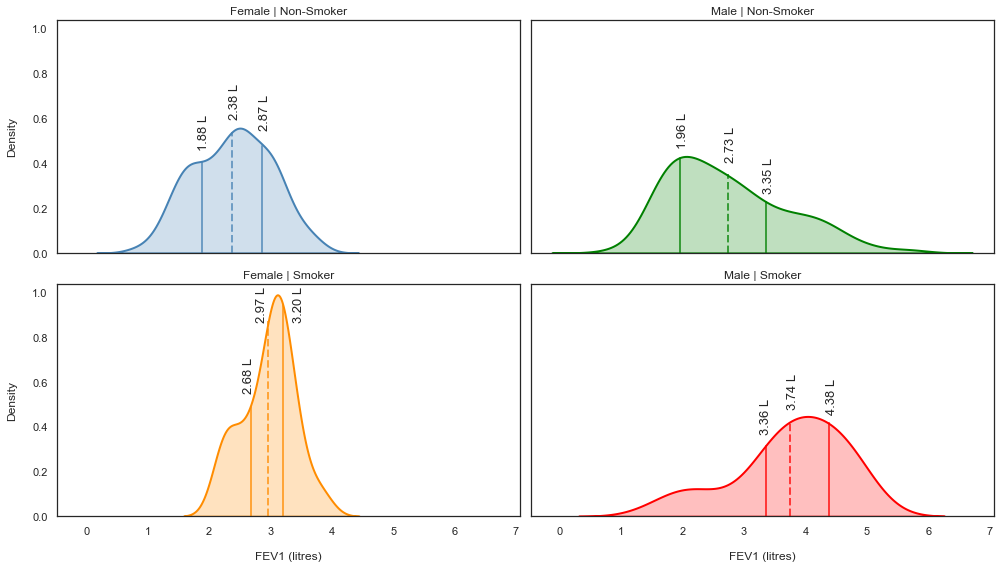

In [611]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(14,8), tight_layout=True, sharex=True, sharey=True)

sns.kdeplot(df_F_nonsmoker.fev, ax=ax[0,0], color="steelblue", shade=True, linewidth=2)
ax[0,0].axvline(x=df_F_nonsmoker.fev.mean(), ymin=0, ymax=0.52, linestyle = '--', alpha =0.7, color="steelblue", linewidth=2)
ax[0,0].axvline(np.quantile(df_F_nonsmoker.fev,0.25), ymin=0, ymax=0.39, linestyle = '-', alpha =0.7, color="steelblue", linewidth=2)
ax[0,0].axvline(np.quantile(df_F_nonsmoker.fev,0.75), ymin=0, ymax=0.46, linestyle = '-', alpha =0.7, color="steelblue", linewidth=2)
ax[0,0].set_xlabel("FEV1 (litres)", labelpad=15)
ax[0,0].set_ylabel("Density", labelpad=15)
ax[0,0].set_title("Female | Non-Smoker")
ax[0,0].text(np.quantile(df_F_nonsmoker.fev,0.25)-0.05,0.47,'%0.2f L' % np.quantile(df_F_nonsmoker.fev,0.25),rotation=90,size=13)
ax[0,0].text(df_F_nonsmoker.fev.mean()-0.05,0.61,'%0.2f L' % df_F_nonsmoker.fev.mean(),rotation=90,size=13)
ax[0,0].text(np.quantile(df_F_nonsmoker.fev,0.75)-0.05,0.56,'%0.2f L' % np.quantile(df_F_nonsmoker.fev,0.75),rotation=90,size=13)

sns.kdeplot(df_M_nonsmoker.fev, ax=ax[0,1], color="green", shade=True, linewidth=2)
ax[0,1].axvline(x=df_M_nonsmoker.fev.mean(), ymin=0, ymax=0.34, linestyle = '--', alpha =0.7, color="green", linewidth=2)
ax[0,1].axvline(np.quantile(df_M_nonsmoker.fev,0.25), ymin=0, ymax=0.41, linestyle = '-', alpha =0.7, color="green", linewidth=2)
ax[0,1].axvline(np.quantile(df_M_nonsmoker.fev,0.75), ymin=0, ymax=0.22, linestyle = '-', alpha =0.7, color="green", linewidth=2)
ax[0,1].set_title("Male | Non-Smoker")
ax[0,1].text(np.quantile(df_M_nonsmoker.fev,0.25)-0.05,0.48,'%0.2f L' % np.quantile(df_M_nonsmoker.fev,0.25),rotation=90,size=13)
ax[0,1].text(df_M_nonsmoker.fev.mean()-0.05,0.42,'%0.2f L' % df_M_nonsmoker.fev.mean(),rotation=90,size=13)
ax[0,1].text(np.quantile(df_M_nonsmoker.fev,0.75)-0.05,0.28,'%0.2f L' % np.quantile(df_M_nonsmoker.fev,0.75),rotation=90,size=13)

sns.kdeplot(df_F_smoker.fev, ax=ax[1,0], color="darkorange", shade=True, linewidth=2)
ax[1,0].axvline(x=df_F_smoker.fev.mean(), ymin=0, ymax=0.84, linestyle = '--', alpha =0.7, color="darkorange", linewidth=2)
ax[1,0].axvline(np.quantile(df_F_smoker.fev,0.25), ymin=0, ymax=0.47, linestyle = '-', alpha =0.7, color="darkorange", linewidth=2)
ax[1,0].axvline(np.quantile(df_F_smoker.fev,0.75), ymin=0, ymax=0.91, linestyle = '-', alpha =0.7, color="darkorange", linewidth=2)
ax[1,0].set_xlabel("FEV1 (litres)", labelpad=15)
ax[1,0].set_ylabel("Density", labelpad=15)
ax[1,0].set_title("Female | Smoker")
ax[1,0].text(np.quantile(df_F_smoker.fev,0.25)-0.12,0.56,'%0.2f L' % np.quantile(df_F_smoker.fev,0.25),rotation=90,size=13)
ax[1,0].text(df_F_smoker.fev.mean()-0.20,0.88,'%0.2f L' % df_F_smoker.fev.mean(),rotation=90,size=13)
ax[1,0].text(np.quantile(df_F_smoker.fev,0.75)+0.17,0.88,'%0.2f L' % np.quantile(df_F_smoker.fev,0.75),rotation=90,size=13)

sns.kdeplot(df_M_smoker.fev, ax=ax[1,1], color="red", shade=True, linewidth=2)
ax[1,1].axvline(x=df_M_smoker.fev.mean(), ymin=0, ymax=0.41, linestyle = '--', alpha =0.7, color="red", linewidth=2)
ax[1,1].axvline(np.quantile(df_M_smoker.fev,0.25), ymin=0, ymax=0.30, linestyle = '-', alpha =0.7, color="red", linewidth=2)
ax[1,1].axvline(np.quantile(df_M_smoker.fev,0.75), ymin=0, ymax=0.40, linestyle = '-', alpha =0.7, color="red", linewidth=2)
ax[1,1].set_xlabel("FEV1 (litres)", labelpad=15)
ax[1,1].set_title("Male | Smoker")
ax[1,1].text(np.quantile(df_M_smoker.fev,0.25)-0.1,0.38,'%0.2f L' % np.quantile(df_M_smoker.fev,0.25),rotation=90,size=13)
ax[1,1].text(df_M_smoker.fev.mean()-0.05,0.49,'%0.2f L' % df_M_smoker.fev.mean(),rotation=90,size=13)
ax[1,1].text(np.quantile(df_M_smoker.fev,0.75)-0.05,0.47,'%0.2f L' % np.quantile(df_M_smoker.fev,0.75),rotation=90,size=13)

plt.show()

In [646]:
#male vs. female smoker
display(sp.stats.ttest_ind(df_M_smoker.fev, df_F_smoker.fev, equal_var=False))

#male vs. female nonsmoker
display(sp.stats.ttest_ind(df_M_nonsmoker.fev, df_F_nonsmoker.fev, equal_var=False))

#male smoker vs. male non smoker
display(sp.stats.ttest_ind(df_M_smoker.fev, df_M_nonsmoker.fev, equal_var=False))

#female smoker vs. female non smoker
display(sp.stats.ttest_ind(df_F_smoker.fev, df_F_nonsmoker.fev, equal_var=False))

Ttest_indResult(statistic=4.153923135531774, pvalue=0.00022063111987904739)

Ttest_indResult(statistic=5.279433099053842, pvalue=1.8828016627742702e-07)

Ttest_indResult(statistic=5.512754546457555, pvalue=5.330497529471535e-06)

Ttest_indResult(statistic=7.543609567796645, pvalue=1.8489602842024496e-10)

Text(0.5, 1.0, 'Height vs. Age Heatmap (n=654)')

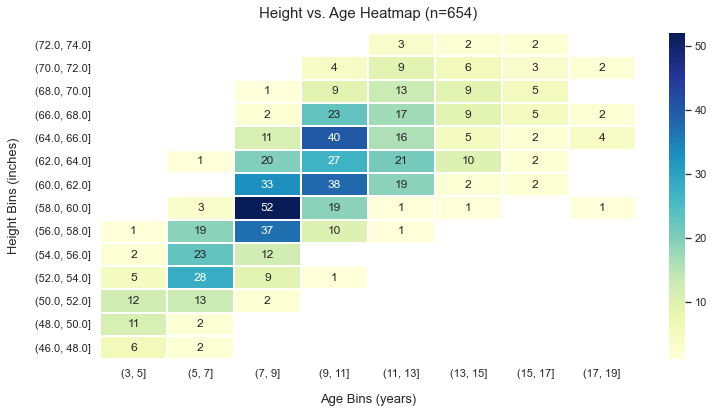

In [712]:

sns.set(rc = {'figure.figsize':(12,6)})
sns.set_style("white")
#height min and max
height_min = min(df['height'])
height_max = max(df['height'])

#age min and max
age_min = min(df['age'])
age_max = max(df['age'])

height_bins_step = 2
height_bins = np.arange(height_min, height_max+height_bins_step, height_bins_step)

age_bins_step = 2
age_bins = np.arange(age_min, age_max+age_bins_step, age_bins_step)

df['height_binned'] = pd.cut(df['height'], height_bins)
df['age_binned'] = pd.cut(df['age'], age_bins)

df_new = df.groupby(['height_binned', 'age_binned']).size().reset_index(name='count') #wrangle count data
df_new = df_new.pivot("height_binned", "age_binned", "count")

ax = sns.heatmap(df_new, annot=True, fmt="d", cmap="YlGnBu", linewidths=1.0, mask=(df_new==0))
plt.ylim(reversed(plt.ylim()))
ax.set_xlabel("Age Bins (years)", labelpad=15, size=13)
ax.set_ylabel("Height Bins (inches)", labelpad=15, size=13)
ax.set_title("Height vs. Age Heatmap (n=654)", size=15, pad=15)



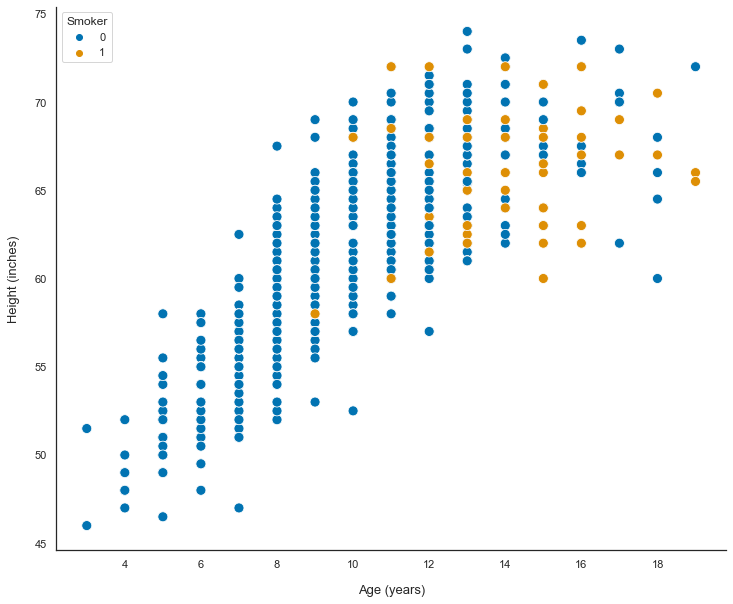

In [666]:

sns.set(rc = {'figure.figsize':(12,10)})
sns.set_style("white")

ax = sns.scatterplot(data=df, x="age", y="height", hue="smoke", palette="colorblind", s = 100)
ax.set_xlabel("Age (years)", labelpad=15, size=13)
ax.set_ylabel("Height (inches)", labelpad=15, size=13)
sns.despine()
plt.legend(title='Smoker', loc='upper left')

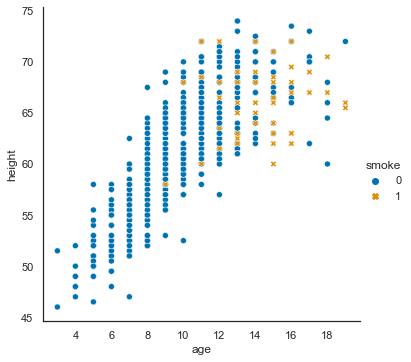

In [575]:
sns.relplot(data=df, x="age", y="height", hue="smoke", style="smoke", kind="scatter", palette="colorblind")

<ipython-input-668-31bccf015c16>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-668-31bccf015c16>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-668-31bccf015c16>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-668-31b

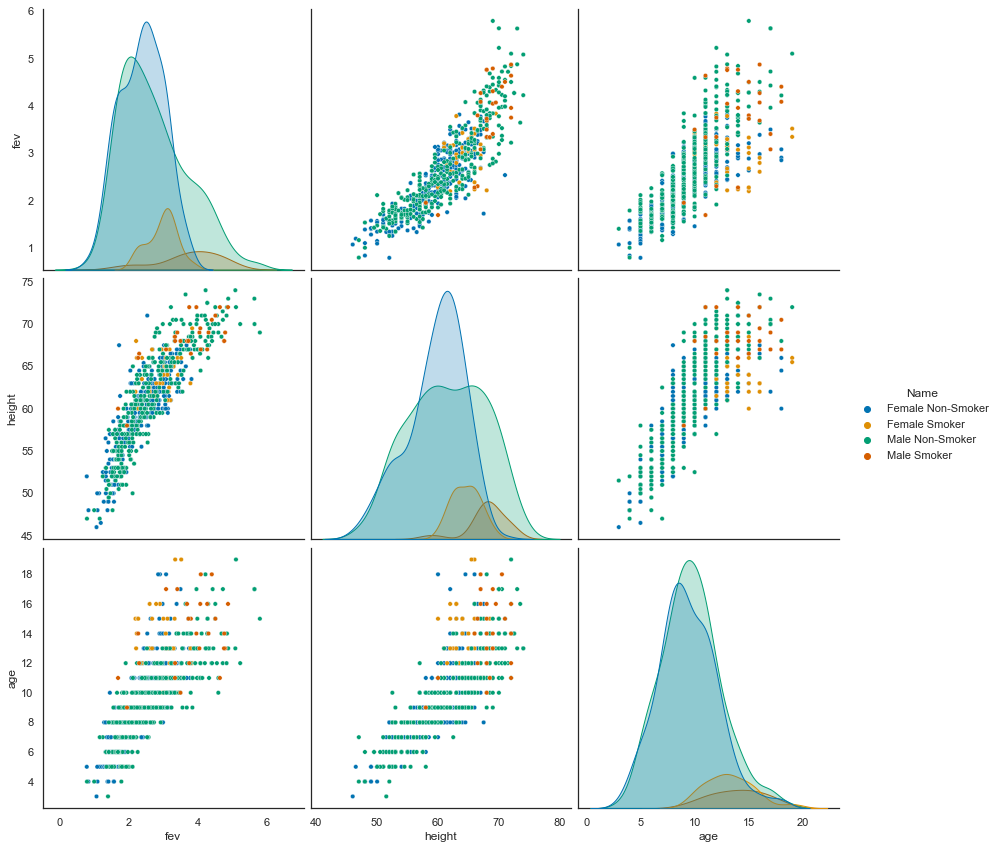

In [668]:
df_F_nonsmoker = df[(df['sex'] == 0) & (df['smoke'] == 0 )]
df_F_nonsmoker['Name'] = ('Female Non-Smoker')

df_F_smoker = df[(df['sex'] == 0) & (df['smoke'] == 1 )]
df_F_smoker['Name'] = ('Female Smoker')

df_M_nonsmoker = df[(df['sex'] == 1) & (df['smoke'] == 0 )]
df_M_nonsmoker['Name'] = ('Male Non-Smoker')

df_M_smoker = df[(df['sex'] == 1) & (df['smoke'] == 1 )]
df_M_smoker['Name'] = ('Male Smoker')

df = pd.concat([df_F_nonsmoker, df_F_smoker, df_M_nonsmoker, df_M_smoker], axis=0)

sns.pairplot(df, hue="Name", palette="colorblind", diag_kind="kde", x_vars=["fev", "height", "age"], y_vars=["fev", "height", "age"], size=4, plot_kws={"s": 20})

In [584]:
df_F_nonsmoker = df[(df['sex'] == 0) & (df['smoke'] == 0 )]
df_F_nonsmoker['Name'] = ('Female Non-Smoker')

df_F_smoker = df[(df['sex'] == 0) & (df['smoke'] == 1 )]
df_F_smoker['Name'] = ('Female Smoker')

df_M_nonsmoker = df[(df['sex'] == 1) & (df['smoke'] == 0 )]
df_M_nonsmoker['Name'] = ('Male Non-Smoker')

df_M_smoker = df[(df['sex'] == 1) & (df['smoke'] == 1 )]
df_M_smoker['Name'] = ('Male Smoker')

df = pd.concat([df_F_nonsmoker, df_F_smoker, df_M_nonsmoker, df_M_smoker], axis=0)

<ipython-input-584-fbb5e2cae805>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-584-fbb5e2cae805>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-584-fbb5e2cae805>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-584-fbb

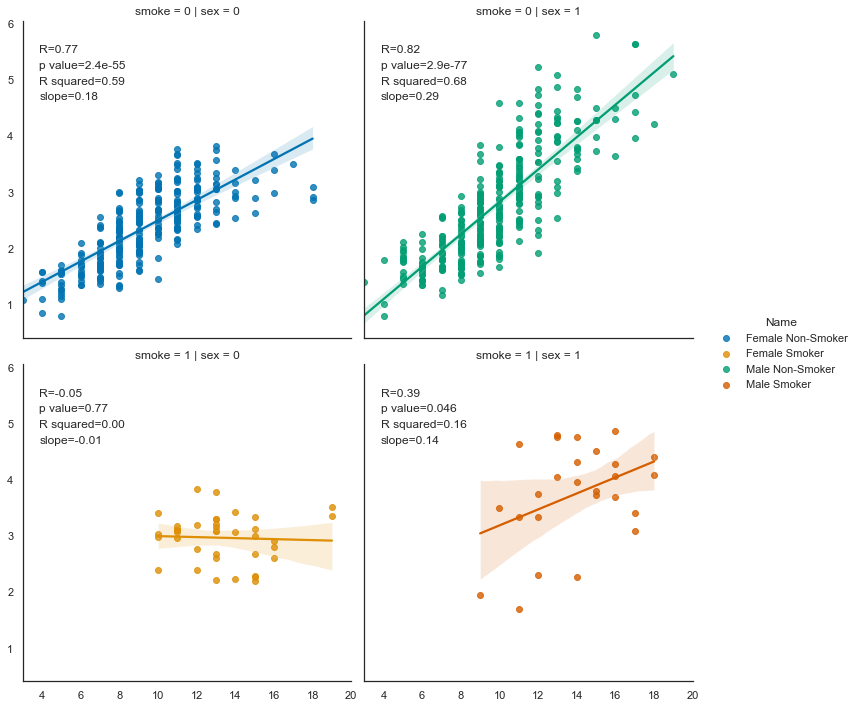

In [690]:
df = df.rename(columns={"age": "Age (years)", "fev": "FEV1 (Liters)"})

g = sns.lmplot(x='Age (years)', y='FEV1 (Liters)', data=df, col='sex', row="smoke", hue="Name", palette='colorblind', sharey=True)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['Age (years)'], data['FEV1 (Liters)'])
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(data['Age (years)'],data['FEV1 (Liters)'])
    ax = plt.gca()
    ax.text(.05, .9, 'R={:.2f}'.format(r, p), size=12,
            transform=ax.transAxes)
    ax.text(.05, .85, 'p value={:.2g}'.format(p), size=12,
            transform=ax.transAxes)
    ax.text(.05, .8, 'R squared={:.2f}'.format((r_value*r_value)), size=12,
            transform=ax.transAxes)
    ax.text(.05, .75, 'slope={:.2f}'.format(slope), size=12,
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
plt.xlim(3, 20)
plt.show()

<ipython-input-699-b8153742ea5d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-699-b8153742ea5d>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-699-b8153742ea5d>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-699-b8

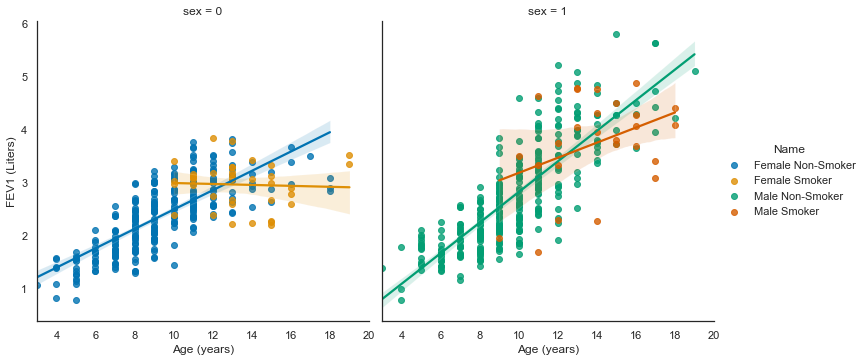

In [699]:
df = pd.read_csv("fev.csv")

df_F_nonsmoker = df[(df['sex'] == 0) & (df['smoke'] == 0 )]
df_F_nonsmoker['Name'] = ('Female Non-Smoker')

df_F_smoker = df[(df['sex'] == 0) & (df['smoke'] == 1 )]
df_F_smoker['Name'] = ('Female Smoker')

df_M_nonsmoker = df[(df['sex'] == 1) & (df['smoke'] == 0 )]
df_M_nonsmoker['Name'] = ('Male Non-Smoker')

df_M_smoker = df[(df['sex'] == 1) & (df['smoke'] == 1 )]
df_M_smoker['Name'] = ('Male Smoker')

df = pd.concat([df_F_nonsmoker, df_F_smoker, df_M_nonsmoker, df_M_smoker], axis=0)

df = df.rename(columns={"age": "Age (years)", "fev": "FEV1 (Liters)"})

ax = sns.lmplot(x='Age (years)', y='FEV1 (Liters)', data=df, col='sex', hue='Name', palette='colorblind', sharey=True)
plt.xlim(3, 20)
plt.show()

<ipython-input-710-1bcbb8aba0c0>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-710-1bcbb8aba0c0>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-710-1bcbb8aba0c0>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-710-1b

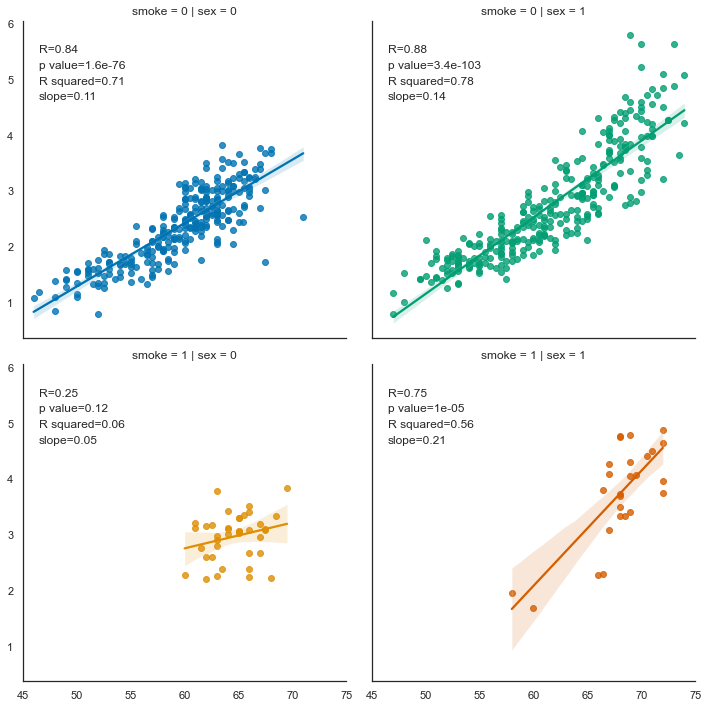

In [710]:

df = pd.read_csv("fev.csv")

df_F_nonsmoker = df[(df['sex'] == 0) & (df['smoke'] == 0 )]
df_F_nonsmoker['Name'] = ('Female Non-Smoker')

df_F_smoker = df[(df['sex'] == 0) & (df['smoke'] == 1 )]
df_F_smoker['Name'] = ('Female Smoker')

df_M_nonsmoker = df[(df['sex'] == 1) & (df['smoke'] == 0 )]
df_M_nonsmoker['Name'] = ('Male Non-Smoker')

df_M_smoker = df[(df['sex'] == 1) & (df['smoke'] == 1 )]
df_M_smoker['Name'] = ('Male Smoker')

df = pd.concat([df_F_nonsmoker, df_F_smoker, df_M_nonsmoker, df_M_smoker], axis=0)


g = sns.lmplot(x='height', y='fev', data=df, col='sex', row="smoke", hue="Name", palette='colorblind', legend=False)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['height'], data['fev'])
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(data['height'],data['fev'])
    ax = plt.gca()
    ax.text(.05, .9, 'R={:.2f}'.format(r, p), size=12,
            transform=ax.transAxes)
    ax.text(.05, .85, 'p value={:.2g}'.format(p), size=12,
            transform=ax.transAxes)
    ax.text(.05, .8, 'R squared={:.2f}'.format((r_value*r_value)), size=12,
            transform=ax.transAxes)
    ax.text(.05, .75, 'slope={:.2f}'.format(slope), size=12,
            transform=ax.transAxes)
    
g.map_dataframe(annotate)

plt.xlim(45, 75)
plt.tight_layout()

In [483]:
df_F_nonsmoker = df[(df['sex'] == 0) & (df['smoke'] == 0 )]
df_F_nonsmoker['Name'] = ('Female Non-Smoker')

df_F_smoker = df[(df['sex'] == 0) & (df['smoke'] == 1 )]
df_F_smoker['Name'] = ('Female Smoker')

df_M_nonsmoker = df[(df['sex'] == 1) & (df['smoke'] == 0 )]
df_M_nonsmoker['Name'] = ('Male Non-Smoker')

df_M_smoker = df[(df['sex'] == 1) & (df['smoke'] == 1 )]
df_M_smoker['Name'] = ('Male Smoker')

df_F = pd.concat([df_F_nonsmoker, df_F_smoker], axis=0)
df_M = pd.concat([df_M_nonsmoker, df_M_smoker], axis=0)

<ipython-input-483-16915ced208d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-483-16915ced208d>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-483-16915ced208d>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-483-169

<Figure size 1080x576 with 0 Axes>

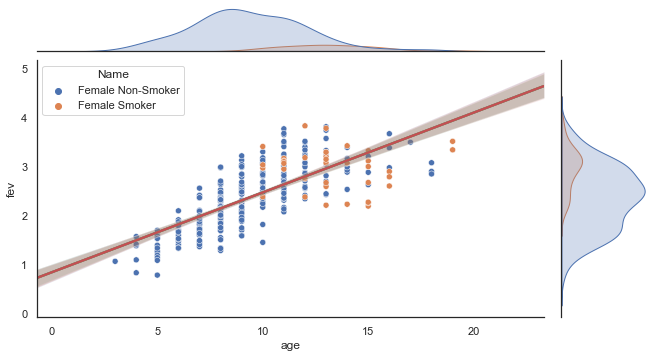

In [484]:
plt.figure(figsize = (15,8))
g = sns.jointplot(data=df_F, x="age", y="fev", hue="Name")

for _,gr in df.groupby("Name"):
    sns.regplot(x="age", y="fev", data=df_F, scatter=False, ax=g.ax_joint, truncate=False)

g.fig.set_size_inches(10,5)
plt.show()

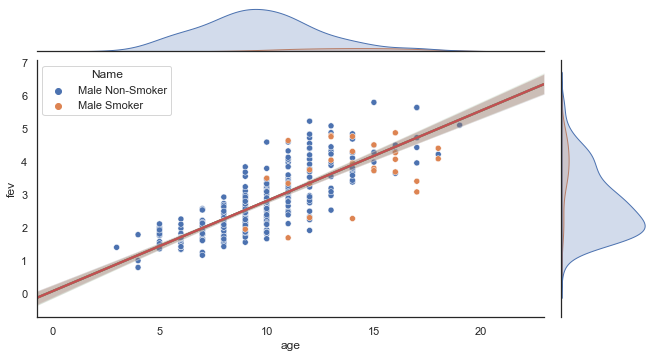

In [485]:


g = sns.jointplot(data=df_M, x="age", y="fev", hue="Name")

for _,gr in df.groupby("Name"):
    sns.regplot(x="age", y="fev", data=df_M, scatter=False, ax=g.ax_joint, truncate=False)

g.fig.set_size_inches(10,5)
plt.show()

In [389]:

df_F_nonsmoker = df[(df['sex'] == 0) & (df['smoke'] == 0 )]
df_F_nonsmoker['Name'] = ('Female Non-Smoker')

df_F_smoker = df[(df['sex'] == 0) & (df['smoke'] == 1 )]
df_F_smoker['Name'] = ('Female Smoker')

df_M_nonsmoker = df[(df['sex'] == 1) & (df['smoke'] == 0 )]
df_M_nonsmoker['Name'] = ('Male Non-Smoker')

df_M_smoker = df[(df['sex'] == 1) & (df['smoke'] == 1 )]
df_M_smoker['Name'] = ('Male Smoker')

df = pd.concat([df_F_nonsmoker, df_F_smoker, df_M_nonsmoker, df_M_smoker], axis=0)






<ipython-input-389-6d83f8cf80e2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-389-6d83f8cf80e2>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-389-6d83f8cf80e2>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-389-6d8

In [196]:

fig = px.scatter_3d(df, x='age', y='fev', z='height',
              color='Name')
fig.show()

<ipython-input-779-2d54db9e1e3f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-779-2d54db9e1e3f>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-779-2d54db9e1e3f>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-779-2d

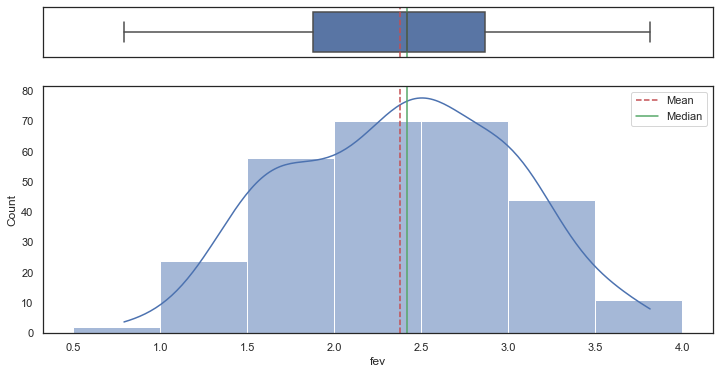

In [779]:
df = pd.read_csv("fev.csv")

df_F_nonsmoker = df[(df['sex'] == 0) & (df['smoke'] == 0 )]
df_F_nonsmoker['Name'] = ('Female Non-Smoker')

df_F_smoker = df[(df['sex'] == 0) & (df['smoke'] == 1 )]
df_F_smoker['Name'] = ('Female Smoker')

df_M_nonsmoker = df[(df['sex'] == 1) & (df['smoke'] == 0 )]
df_M_nonsmoker['Name'] = ('Male Non-Smoker')

df_M_smoker = df[(df['sex'] == 1) & (df['smoke'] == 1 )]
df_M_smoker['Name'] = ('Male Smoker')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_F_nonsmoker['fev'].mean()
median=df_F_nonsmoker['fev'].median()
mode=df_F_nonsmoker['fev'].mode().values[0]

sns.boxplot(data=df_F_nonsmoker, x="fev", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

bins = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]

sns.histplot(data=df_F_nonsmoker, x="fev", ax=ax_hist, kde=True, bins=bins)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

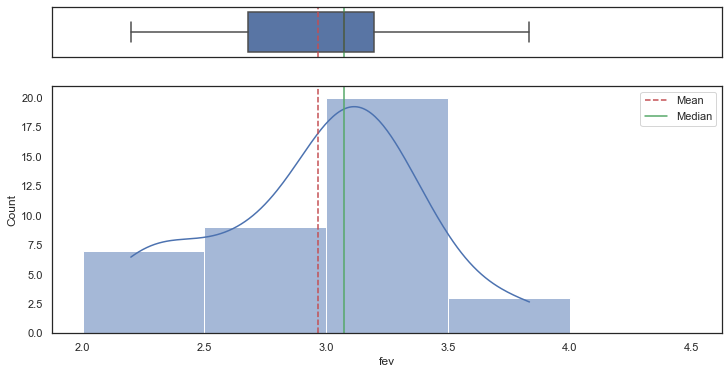

In [784]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_F_smoker['fev'].mean()
median=df_F_smoker['fev'].median()
mode=df_F_smoker['fev'].mode().values[0]

sns.boxplot(data=df_F_smoker, x="fev", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

bins = [2.0,2.5,3.0,3.5,4.0,4.5]

sns.histplot(data=df_F_smoker, x="fev", ax=ax_hist, kde=True, bins=bins)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

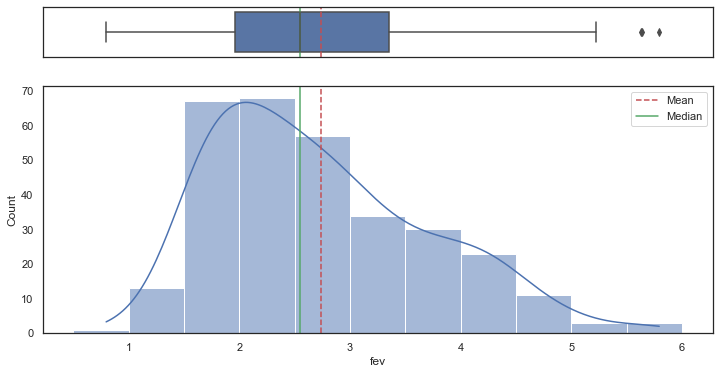

In [786]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_M_nonsmoker['fev'].mean()
median=df_M_nonsmoker['fev'].median()
mode=df_M_nonsmoker['fev'].mode().values[0]

sns.boxplot(data=df_M_nonsmoker, x="fev", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

bins = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0]

sns.histplot(data=df_M_nonsmoker, x="fev", ax=ax_hist, kde=True, bins=bins)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

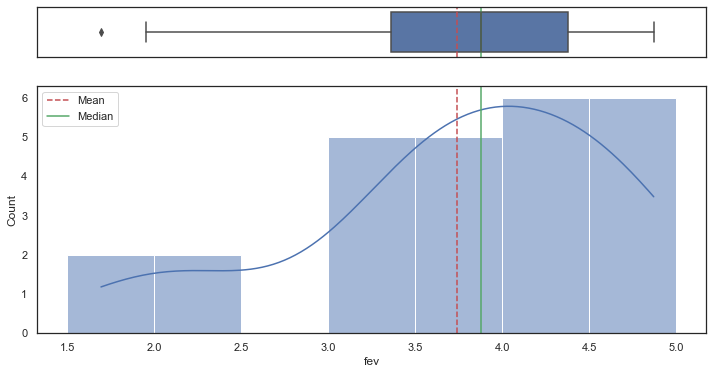

In [782]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_M_smoker['fev'].mean()
median=df_M_smoker['fev'].median()
mode=df_M_smoker['fev'].mode().values[0]

sns.boxplot(data=df_M_smoker, x="fev", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

bins = [1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]

sns.histplot(data=df_M_smoker, x="fev", ax=ax_hist, kde=True, bins=bins)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

<ipython-input-532-b2bb263be636>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-532-b2bb263be636>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



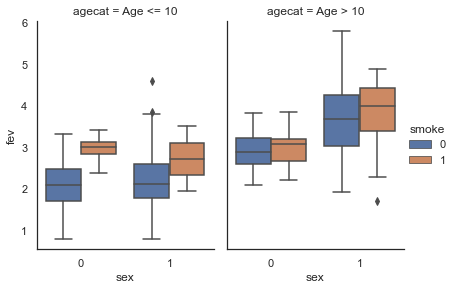

In [532]:
df = pd.read_csv("fev.csv")
df

#make a sns grid cut be age categories ()

df_young = df[(df['age'] <= 10)]
df_young['agecat'] = "Age <= 10"
df_old = df[(df['age'] > 10)]
df_old['agecat'] = "Age > 10"

df_box = pd.concat([df_young, df_old], axis=0)

#patients that smoked at a young age were maybe more physically mature and large and therefore prone to smoke
#fev is a proxy for physical development 

g = sns.catplot(x="sex", y="fev",
                hue="smoke", col="agecat",
                data=df_box, kind="box",
                height=4, aspect=.7)


<ipython-input-541-6d31596927be>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-541-6d31596927be>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-541-6d31596927be>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-541-6

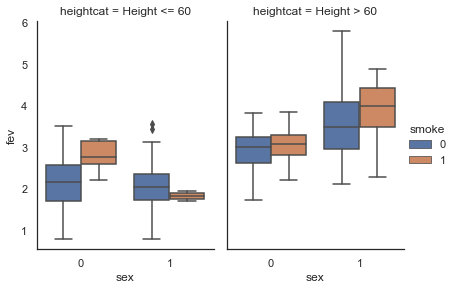

In [541]:
df = pd.read_csv("fev.csv")
df

df_M = df[(df['sex'] == 1)]
df_F = df[(df['sex'] == 0)]

df_short_M = df_M[(df_M['height'] <= 62.5)]
df_short_M['heightcat'] = "Height <= 60"
df_tall_M = df_M[(df_M['height'] > 62.5)]
df_tall_M['heightcat'] = "Height > 60"

df_short_F = df_F[(df_F['height'] <= 62.5)]
df_short_F['heightcat'] = "Height <= 60"
df_tall_F = df_F[(df_F['height'] > 62.5)]
df_tall_F['heightcat'] = "Height > 60"

df_box_height = pd.concat([df_short_M, df_tall_M, df_short_F, df_tall_F], axis=0)

#patients that smoked at a young age were maybe more physically mature and large and therefore prone to smoke
#fev is a proxy for physical development 

g = sns.catplot(x="sex", y="fev",
                hue="smoke", col="heightcat",
                data=df_box_height, kind="box",
                height=4, aspect=.7)

<ipython-input-742-3c02099fdad8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-742-3c02099fdad8>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-742-3c02099fdad8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-742-3c0

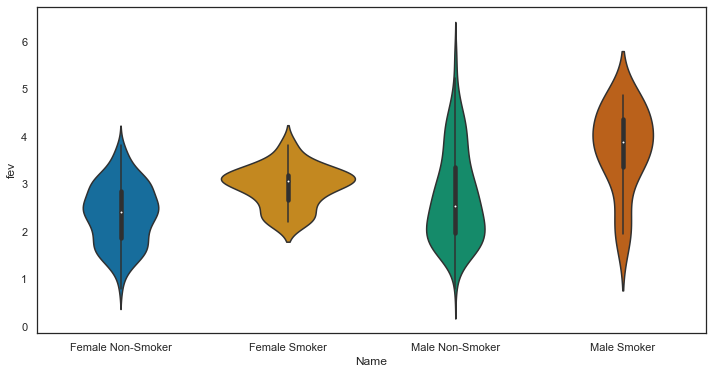

In [742]:
df_F_nonsmoker = df[(df['sex'] == 0) & (df['smoke'] == 0 )]
df_F_nonsmoker['Name'] = ('Female Non-Smoker')

df_F_smoker = df[(df['sex'] == 0) & (df['smoke'] == 1 )]
df_F_smoker['Name'] = ('Female Smoker')

df_M_nonsmoker = df[(df['sex'] == 1) & (df['smoke'] == 0 )]
df_M_nonsmoker['Name'] = ('Male Non-Smoker')

df_M_smoker = df[(df['sex'] == 1) & (df['smoke'] == 1 )]
df_M_smoker['Name'] = ('Male Smoker')

df = pd.concat([df_F_nonsmoker, df_F_smoker, df_M_nonsmoker, df_M_smoker], axis=0)

ax = sns.violinplot(x="Name", y="fev", palette="colorblind", data=df, dodge=False)

In [766]:

df = pd.read_csv("fev.csv")

df_F_nonsmoker = df[(df['sex'] == 0) & (df['smoke'] == 0 )]
df_F_nonsmoker['Name'] = ('Female Non-Smoker')

df_F_smoker = df[(df['sex'] == 0) & (df['smoke'] == 1 )]
df_F_smoker['Name'] = ('Female Smoker')

df_M_nonsmoker = df[(df['sex'] == 1) & (df['smoke'] == 0 )]
df_M_nonsmoker['Name'] = ('Male Non-Smoker')

df_M_smoker = df[(df['sex'] == 1) & (df['smoke'] == 1 )]
df_M_smoker['Name'] = ('Male Smoker')

df = pd.concat([df_F_nonsmoker, df_F_smoker, df_M_nonsmoker, df_M_smoker], axis=0)


df_filtered = df[['age', 'Name']]
a = df_filtered.groupby('Name').describe().round(1)
display(a)

df_filtered = df[['height', 'Name']]
b = df_filtered.groupby('Name').describe().round(1)
display(b)

df_filtered = df[['fev', 'Name']]
c = df_filtered.groupby('Name').describe().round(1)
display(c)

<ipython-input-766-9fe9f578ee9d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-766-9fe9f578ee9d>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-766-9fe9f578ee9d>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-766-9f

age                                         
                   count  mean  std   min   25%   50%   75%   max
Name                                                             
Female Non-Smoker  279.0   9.4  2.7   3.0   8.0   9.0  11.0  18.0
Female Smoker       39.0  13.3  2.2  10.0  11.5  13.0  15.0  19.0
Male Non-Smoker    310.0   9.7  2.8   3.0   8.0  10.0  11.0  19.0
Male Smoker         26.0  13.9  2.5   9.0  12.0  14.0  16.0  18.0

height                                         
                   count  mean  std   min   25%   50%   75%   max
Name                                                             
Female Non-Smoker  279.0  59.6  4.7  46.0  57.0  60.5  63.0  71.0
Female Smoker       39.0  64.6  2.3  60.0  63.0  65.0  66.0  69.5
Male Non-Smoker    310.0  61.5  6.3  47.0  57.0  61.5  66.9  74.0
Male Smoker         26.0  68.1  3.2  58.0  67.0  68.0  69.4  72.0

fev                                   
                   count mean  std  min  25%  50%  75%  max
Name                                                       
Female Non-Smoker  279.0  2.4  0.6  0.8  1.9  2.4  2.9  3.8
Female Smoker       39.0  3.0  0.4  2.2  2.7  3.1  3.2  3.8
Male Non-Smoker    310.0  2.7  1.0  0.8  2.0  2.5  3.4  5.8
Male Smoker         26.0  3.7  0.9  1.7  3.4  3.9  4.4  4.9

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

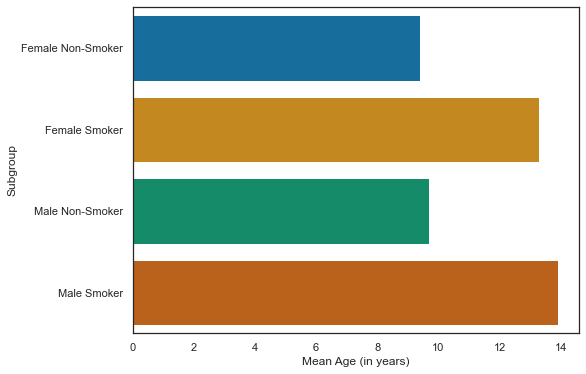

In [807]:
data = {"Mean Age (in years)": [9.4,13.3,9.7,13.9], "std": [2.7,2.2,2.8,2.5], "Subgroup": ["Female Non-Smoker", "Female Smoker", "Male Non-Smoker", "Male Smoker"]}
df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x="Mean Age (in years)", y="Subgroup", data=df, palette="colorblind", ax=ax)

# add the annotation
ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')

ax.set(ylabel='Mean Time')
plt.show()


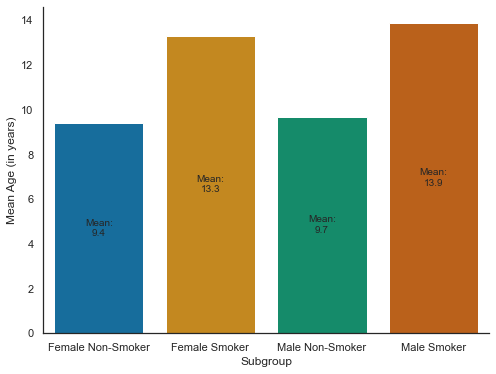

In [814]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Subgroup', y='Mean Age (in years)', data=df, capsize=0.2, ax=ax, palette="colorblind")

# show the mean
for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2., h / 2)
    text = f'Mean:\n{h:0.1f}'
    ax.annotate(text=text, xy=xy, ha='center', va='center')

ax.set(xlabel='Subgroup', ylabel='Mean Age (in years)')
sns.despine()
plt.show()

<ipython-input-834-7a458170c4b1>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-834-7a458170c4b1>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-834-7a458170c4b1>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-834-7a

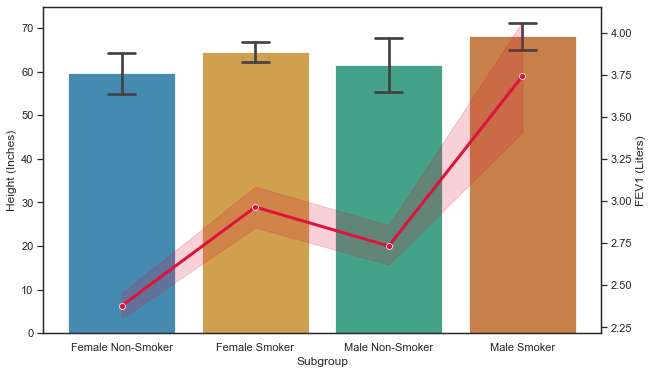

In [834]:

from matplotlib.ticker import PercentFormatter

df = pd.read_csv("fev.csv")

df_F_nonsmoker = df[(df['sex'] == 0) & (df['smoke'] == 0 )]
df_F_nonsmoker['Name'] = ('Female Non-Smoker')

df_F_smoker = df[(df['sex'] == 0) & (df['smoke'] == 1 )]
df_F_smoker['Name'] = ('Female Smoker')

df_M_nonsmoker = df[(df['sex'] == 1) & (df['smoke'] == 0 )]
df_M_nonsmoker['Name'] = ('Male Non-Smoker')

df_M_smoker = df[(df['sex'] == 1) & (df['smoke'] == 1 )]
df_M_smoker['Name'] = ('Male Smoker')

df = pd.concat([df_F_nonsmoker, df_F_smoker, df_M_nonsmoker, df_M_smoker], axis=0)

df = df.rename(columns={"height": "Height (Inches)", "fev": "FEV1 (Liters)", "Name":"Subgroup"})

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Subgroup", y="Height (Inches)", data=df, palette="colorblind", ci="sd", capsize=0.2, alpha=0.8)

ax2 = ax.twinx()
sns.lineplot(x="Subgroup", y="FEV1 (Liters)", data=df, marker='o', color='crimson', lw=3, ax=ax2)


plt.show()



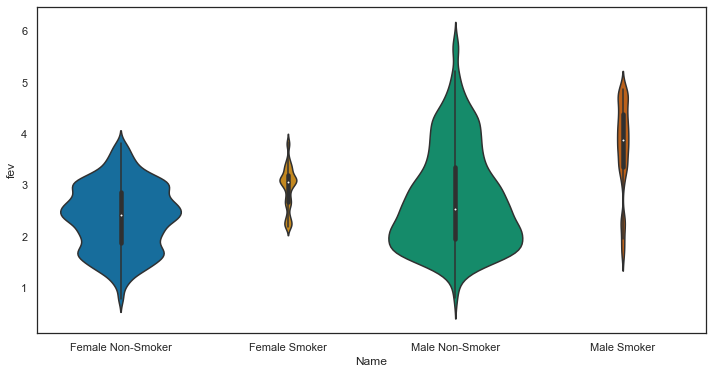

In [548]:
ax = sns.violinplot(x="Name", y="fev", data=df, palette="colorblind", split=True, scale="count", scale_hue=False, bw=0.2)